# Ar study  

load the needed modules

In [33]:
from dlpoly import DLPoly
import os
from dlpoly.rdf import rdf                                                                                                          
from dlpoly.statis import Statis

import matplotlib                                                                                                                   
import matplotlib.pyplot as plt


dlp='/home/drFaustroll/bin/DLPOLY.Z'

define some helper functions

In [47]:
def showrdf(loc):
    m = rdf(loc)
    for i in range(len(m.labels)):
        plt.plot(m.x, m.data[i,:,0],label = "-".join(m.labels[i]))
    plt.xlabel("r [Å])")
    plt.ylabel("gofr [a.u.])")
    plt.legend()

def showTimeseries(s,l):
    plt.plot(s.data[:,1], s.data[:,l])
    plt.xlabel("time [ps])")
    plt.ylabel(s.labels[l])


load the input files, set the working folder and then run.

In [36]:
dlPoly = DLPoly(control="Ar.control", config="Ar.config",
                field="Ar.field", workdir="argon")
dlPoly.run(executable=dlp,numProcs = 4)

Folder argon exists, over-writing.


0

show radial distribution function

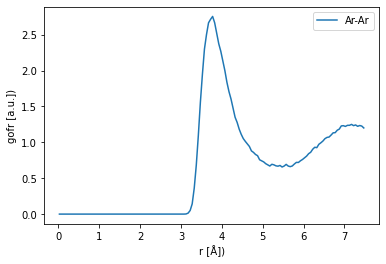

In [48]:
showrdf("argon/RDFDAT")

load statis file. contains all kind of timeseries of use. print statis.labels to see all the available data metadata

['iter', 'time', 'vars', '1-1 Total Extended System Energy', '1-2 System Temperature', '1-3 Configurational Energy', '1-4 Short Range Potential Energy', '1-5 Electrostatic Energy', '2-1 Chemical Bond Energy', '2-2 Valence Angle And 3-Body Potential Energy', '2-3 Dihedral, Inversion, And 4-Body Potential Energy', '2-4 Tethering Energy', '2-5 Enthalpy (Total Energy + Pv)', '3-1 Rotational Temperature', '3-2 Total Virial', '3-3 Short-Range Virial', '3-4 Electrostatic Virial', '3-5 Bond Virial', '4-1 Valence Angle And 3-Body Virial', '4-2 Constraint Bond Virial', '4-3 Tethering Virial', '4-4 Volume', '4-5 Core-Shell Temperature', '5-1 Core-Shell Potential Energy', '5-2 Core-Shell Virial', '5-3 Md Cell Angle Α', '5-4 Md Cell Angle Β', '5-5 Md Cell Angle Γ', '6-1 Pmf Constraint Virial', '6-2 Pressure', '6-3 External Degree Of Freedom', '6-4 stress xx', '6-5 stress xy', '7-1 stress xz', '7-2 stress yx', '7-3 stress yy', '7-4 stress yz', '7-5 stress zx', '8-1 stress zy', '8-2 stress zz', '8-3 

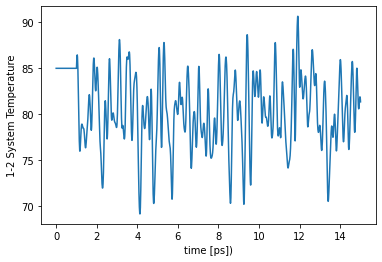

In [49]:
statis=Statis("argon/STATIS")
print(statis.labels)
showTimeseries(statis,4)

#change potential parameters

In [63]:
wkd='argon-neweps'
field = DLPoly(field="Ar.field").field
field.vdws[0].params=['1.1','3.0']
field.write('Ar-n.field')

dlPoly = DLPoly(control="Ar.control", config="argon/REVCON", destconfig="Ar.config",
                field='Ar-n.field', workdir=wkd)

dlPoly.run(executable=dlp,numProcs = 2)

Folder argon-neweps exists, over-writing.


28

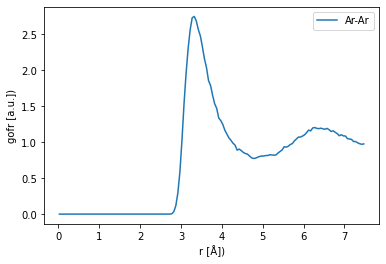

In [64]:
showrdf(os.path.join("argon-neweps/RDFDAT"))

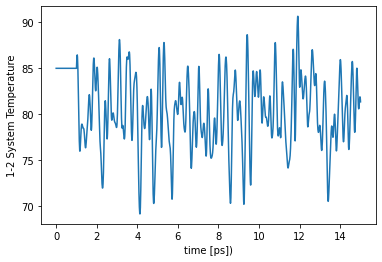

In [53]:
statis=Statis("argon/STATIS")
showtemp(statis)